In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\My Folder\Machine Learning Models\Datasets\zomato.csv", encoding='latin-1')

In [4]:
df.shape

(9551, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Missing Values

In [6]:
[feature for feature in df.columns if df[feature].isnull().sum() > 0 ]

['Cuisines']

In [7]:
country_code = pd.read_csv(r"C:\Users\HP\Downloads\Country.csv")

In [8]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [9]:

new_df = df.merge(country_code, how='left', on = 'Country Code')

In [10]:
# Checking Data Type
new_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [11]:
new_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
new_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [13]:
new_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [14]:
country_name = new_df.Country.value_counts().index
country_count = new_df.Country.value_counts().values
print(country_name, country_count)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country') [8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x2775528a750>,
 [Text(-1.1814264849404859, 0.2103127687069152, 'India'),
  Text(1.1752163961157496, -0.2426240348784715, 'United States'),
  Text(1.1995489344179584, -0.03289914796375026, 'United Kingdom')],
 [Text(-0.6891654495486166, 0.1226824484123672, '94.4%'),
  Text(0.6855428977341871, -0.1415306870124417, '4.7%'),
  Text(0.6997368784104756, -0.019191169645520985, '0.9%')])

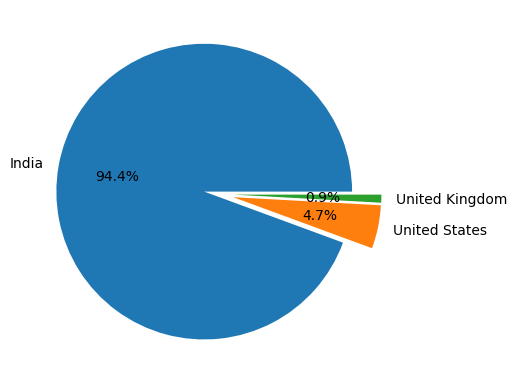

In [15]:
plt.pie(country_count[:3], labels=country_name[:3], autopct='%.1f%%', explode = [0.1,0.1,0.1])

- Observation - Zomato's maximum transaction are from India then United States then United Kingdom

In [16]:
rating_df = new_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating count'})
rating_df

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation
1. 4.5 - 4.9 --> Excellent
2. 4.0 - 4.4 --> Very Good
3. 3.5 - 3.9 --> Good
4. 2.5 - 3.4 --> Average
5. 1.8 - 2.4 --> Poor

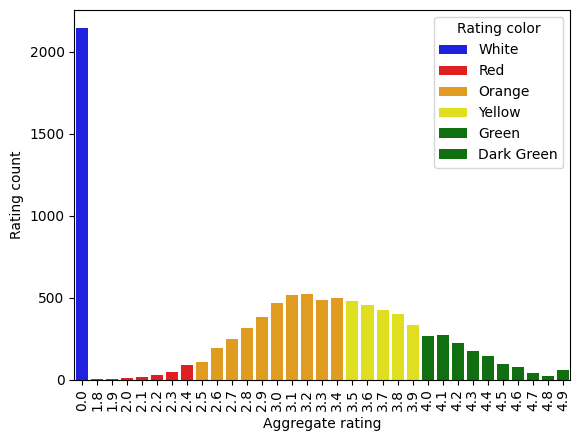

In [17]:
sns.barplot(data = rating_df, x = 'Aggregate rating', y = 'Rating count', hue = 'Rating color', palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'])
plt.xticks(rotation = 90)
plt.show()


## Obserbvation
1. Not- Rated count is very High
2. Most of the Rating is between 2.5 - 3.4

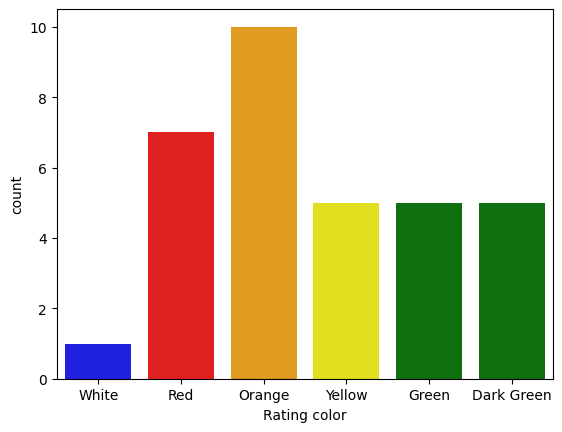

In [18]:
sns.countplot(data = rating_df,hue = 'Rating color' ,x = 'Rating color', palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'])
plt.show()

In [19]:
# Which Country has maximum number of zero rating ?
new_df.loc[new_df['Aggregate rating'] == 0.0]['Country'].value_counts().reset_index()

,Country,count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


## Observation
Maximum number of zero rating are from Indian Customers ie. 99.58% (from 2148 0 rating 2139 are from India) 

In [20]:
# Which currency is used by which country ?
new_df.groupby(['Currency', 'Country']).size().reset_index().rename(columns={0:'Counts'})

,Currency,Country,Counts
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [21]:
# Which country has online delivery options ?
new_df.loc[new_df['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index().rename(columns={0:'Counts'})

,Country,Counts
0,India,2423
1,UAE,28


In [22]:
new_df.groupby(['Country', 'Has Online delivery']).size().reset_index().rename(columns={0:'Counts'})

,Country,Has Online delivery,Counts
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


## Observation
- Option for online deliveries are only available in India and UAE

([<matplotlib.patches.Wedge at 0x2775735c9b0>,
 [Text(-0.6704022251261892, 0.9952692382194149, 'New Delhi'),
  Text(0.0680375442154301, -1.198069652640085, 'Gurgaon'),
  Text(0.9588046051784422, -0.7215911093469844, 'Noida'),
  Text(1.1915147435033584, -0.14245215342045991, 'Faridabad'),
  Text(1.1999413935485705, -0.011859681644731961, 'Ghaziabad')],
 [Text(-0.39106796465694366, 0.5805737222946586, '68.9%'),
  Text(0.03968856745900088, -0.6988739640400494, '14.1%'),
  Text(0.5593026863540912, -0.4209281471190742, '13.6%'),
  Text(0.6950502670436256, -0.08309708949526828, '3.2%'),
  Text(0.6999658129033328, -0.0069181476260936434, '0.3%')])

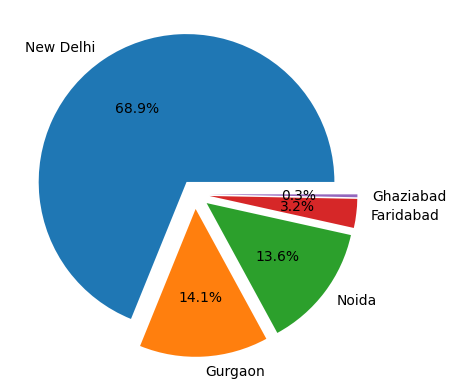

In [23]:
# Create a pie chart for cities Distribution
city_names = new_df['City'].value_counts().index
city_count = new_df['City'].value_counts().values
plt.pie(data=new_df, x = city_count[:5], labels=city_names[:5], autopct='%.1f%%', explode=[0.1,0.1,0.1,0.1,0.1])

In [24]:
# top 10 cuisines
new_df.Cuisines.fillna('Unknown', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6732\4206970529.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df.Cuisines.fillna('Unknown', inplace=True)


In [25]:
new_df.Cuisines.isnull().sum()

np.int64(0)

In [26]:
new_df['Cuisines'].value_counts().reset_index()[:11]

,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Fast Food,354
3,Chinese,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149


## Observation
- North Indian Food is the most ordered cuisine followed by North Indian, Chinese and Fast Food